In [1]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os

In [2]:

file_path = 'D:\\UFL\\cap5404\\Part1\\tictactoedatasets\\tictac_final.txt'
print('File exists:', os.path.exists(file_path))
file_path2 = 'D:\\UFL\\cap5404\\Part1\\tictactoedatasets\\tictac_multi.txt'
print('File2 exists:', os.path.exists(file_path2))
file_path3 = 'D:\\UFL\\cap5404\\Part1\\tictactoedatasets\\tictac_single.txt'
print('File2 exists:', os.path.exists(file_path3))

print("Load data from tictac_final")
np.arr = np.loadtxt(file_path)
X = np.arr[:, : 9 ]
Y = np.arr[:, 9 : ]
print(X.shape)
print(Y.shape)
print("Load final complete")

print("Load data from tictac_multi")
np.arr2 = np.loadtxt(file_path2)
X2 = np.arr2[:, : 9 ]
Y2 = np.arr2[:, 9 : ]
print(X2.shape)
print(Y2.shape)
print("Load multi complete")

print("Load data from tictac_single")
np.arr3 = np.loadtxt(file_path3)
X3 = np.arr3[:, : 9 ]
Y3 = np.arr3[:, 9 : ]
print(X3.shape)
print(Y3.shape)
print("Load single complete")


File exists: True
File2 exists: True
File2 exists: True
Load data from tictac_final
(958, 9)
(958, 1)
Load final complete
Load data from tictac_multi
(6551, 9)
(6551, 9)
Load multi complete
Load data from tictac_single
(6551, 9)
(6551, 1)
Load single complete


In [3]:
print("dataset_final file:")
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.8)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
print("="*20)

print("dataset_multi file:")
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size = 0.8)
print (x_train2.shape, y_train2.shape)
print (x_test2.shape, y_test2.shape)
print("="*20)

print("dataset_single file:")
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size = 0.8)
print (x_train3.shape, y_train3.shape)
print (x_test3.shape, y_test3.shape)

dataset_final file:
(191, 9) (191, 1)
(767, 9) (767, 1)
dataset_multi file:
(1310, 9) (1310, 9)
(5241, 9) (5241, 9)
dataset_single file:
(1310, 9) (1310, 1)
(5241, 9) (5241, 1)


In [86]:
def _init_MLP():
    param_setting =[{
        'hidden_layer_sizes': [(150,100,50,10)],
        'activation':['relu', 'sigmoid'],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant']
    }]
    
    kfd = KFold(n_splits = 20, shuffle=True, random_state = 10)
    
    iter_clf = MLPClassifier(max_iter = 1000)
    #class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, 
    #scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, 
    #return_train_score=False)[source]
    clf = GridSearchCV(iter_clf, param_setting, n_jobs =-1, cv=kfd, scoring="accuracy")
    
    iter_reg = MLPRegressor(random_state=20, max_iter=1000)
    
    reg = GridSearchCV(iter_reg, param_setting, cv=kfd, n_jobs=-1)
    
    return clf, reg

In [78]:
def MLP_classifier(x_train, y_train, x_test, y_test):
    clf, reg = _init_MLP()
    clf.fit(x_train, y_train)
    
    best_score = clf.best_score_
    best_params = clf.best_params_
    best_esti = clf.best_estimator_
    y_pred = clf.predict(x_test)
    
    print("The best socre is: ")
    print(best_score)
    print("The best params is: ")
    print(best_params)
    #print("The best estimator is: ")
    #print(best_esti)
    #print("The best prediction for y is: ")
    #print(y_pred)
    #print(y_test)
    
    #nomalize default is true here
    test_acc = accuracy_score(y_test, y_pred)
    print('Test accuracy:', test_acc)
    test_acc = accuracy_score(y_test, y_pred, normalize=False)
    print('Test accuracy with normalize flase: \n', test_acc)  

    
    cm = confusion_matrix(y_test, y_pred)
    cm = cm/cm.astype(np.float).sum(axis = 1)
    print("Confusion Matrix is: ")
    print(cm)
    
    plot_confusion_matrix(clf, x_test, y_pred)  
    plt.show()
    


MLP classifier using final dataset


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "D:\Anaconda3\lib\site-packag

The best socre is: 
0.9527777777777778
The best params is: 
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (150, 100, 50, 10), 'learning_rate': 'constant'}
Test accuracy: 0.9739243807040417
Test accuracy with normalize flase: 
 747
Confusion Matrix is: 
[[0.95112782 0.0259481 ]
 [0.02631579 0.98602794]]


C:\Users\14044\AppData\Local\Temp\ipykernel_31116\800025283.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = cm/cm.astype(np.float).sum(axis = 1)


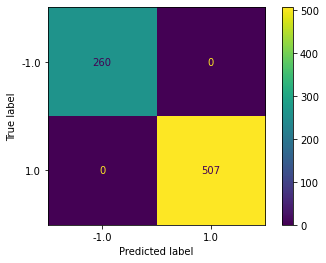

MLP classifier using single dataset


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "D:\Anaconda3\lib\site-packag

The best socre is: 
0.7694172494172494
The best params is: 
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50, 10), 'learning_rate': 'constant'}
Test accuracy: 0.7887807670291929
Test accuracy with normalize flase: 
 4134
Confusion Matrix is: 
[[0.89401294 0.01767305 0.02915082 0.0391198  0.04275534 0.05
  0.05517241 0.00970874 0.0109589 ]
 [0.02912621 0.73932253 0.05830165 0.03667482 0.04275534 0.03928571
  0.04367816 0.02427184 0.02465753]
 [0.0315534  0.03681885 0.77439797 0.05623472 0.04631829 0.03214286
  0.02758621 0.04854369 0.05753425]
 [0.01699029 0.00883652 0.00506971 0.72371638 0.03206651 0.025
  0.05287356 0.05825243 0.03561644]
 [0.03964401 0.03387334 0.01013942 0.01466993 0.84441805 0.05357143
  0.02988506 0.01941748 0.03561644]
 [0.00242718 0.03387334 0.00506971 0.00977995 0.00356295 0.8
  0.0183908  0.01456311 0.02191781]
 [0.02912621 0.02945508 0.01901141 0.05623472 0.00475059 0.02142857
  0.71954023 0.02912621 0.03287671]
 [0.01618123 0.0191458

C:\Users\14044\AppData\Local\Temp\ipykernel_31116\800025283.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = cm/cm.astype(np.float).sum(axis = 1)


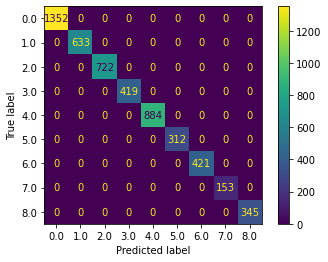

In [87]:
print("MLP classifier using final dataset")
MLP_classifier(x_train, y_train, x_test, y_test)
print("="*20)
print("="*20)
print("MLP classifier using single dataset")
MLP_classifier(x_train3, y_train3, x_test3, y_test3)

In [80]:
import pickle
def MLP_regressor(x_train, y_train, x_test, y_test):
    clf, reg = _init_MLP()
    reg.fit(x_train, y_train)
     
    best_score = reg.best_score_
    best_params = reg.best_params_
    best_esti = reg.best_estimator_
    y_pred1 = reg.predict(x_test)
    
    print("The best socre is: ")
    print(best_score)
    print("The best params is: ")
    print(best_params)
    
    y_pred = np.where(y_pred1 > 0.5, 1, 0)
    #print(y_pred1)
    # print(y_test)
    
    #nomalize default is true here
    test_acc = accuracy_score(y_test, y_pred)
    print('Test accuracy:', test_acc)
    test_acc = accuracy_score(y_test, y_pred, normalize=False)
    print('Test accuracy with normalize flase: \n', test_acc)  

    total_acc = np.zeros(9)
    acc = 0
    for i in range(9):
        total_acc[i] = accuracy_score(y_test[:, i],y_pred[:, i], normalize=False)
        acc += total_acc[i]
    
    size = np.shape(y_test)[0] * 9
    acc /= size
    print("The accuracy calculate via MLP is: "+ str(acc))
    
    
    
    
 
    
    filename = 'mlp_model.pkl'
    pickle.dump(reg, open(filename, 'wb'))
    

In [81]:
MLP_regressor(x_train2, y_train2, x_test2, y_test2)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 762, in fit
    return self._fit(X, y, incremental=False)
  File "D:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 385, in _fit
    self._validate_hyperparameters()
  File "D:\Anaconda3\lib\site-packag

The best socre is: 
0.43295303364725674
The best params is: 
{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50, 10), 'learning_rate': 'constant'}
Test accuracy: 0.3594733829421866
Test accuracy with normalize flase: 
 1884
The accuracy calculate via MLP is: 0.8774194916152558


In [51]:
def regression_using_mlp(np_x_train, np_x_test, np_y_train, np_y_test):
        filename = 'model_params.pkl'
        print(" --->>> MLP Regression")
        # folds = KFold(n_splits=10, shuffle=True, random_state=1)
        param_grid = [
            {
                'max_iter': [1000],
                'hidden_layer_sizes': [(200, 100, 100, 50), (200, 100, 50)],
                'activation': ['tanh', 'relu'],
                'solver': ['adam', 'lbfgs', 'sgd'],
                'alpha': [0.0001],
                'learning_rate': ['constant'],
            }
        ]

        clf = GridSearchCV(MLPRegressor(random_state=1), param_grid, cv=10, n_jobs=-1)
        clf.fit(np_x_train, np_y_train)
        best_score = clf.best_score_
        # print(best_score)
        print("Best parameters set found on development set:")
        print(clf.best_params_)

        best_hyperparams = clf.best_params_
        best_solver = best_hyperparams["solver"]
        best_learning_rate = best_hyperparams["learning_rate"]
        max_iter = best_hyperparams["max_iter"]
        best_layer_size = best_hyperparams["hidden_layer_sizes"]
        best_alpha = best_hyperparams["alpha"]
        best_activation = best_hyperparams["activation"]

        final_clf = MLPRegressor(random_state=20,
                                 max_iter=max_iter, activation=best_activation,
                                 hidden_layer_sizes=best_layer_size,
                                 learning_rate=best_learning_rate,
                                 solver=best_solver,
                                 alpha=best_alpha)

        final_clf.fit(np_x_train, np_y_train)
        y_pred = final_clf.predict(np_x_test)

        y_pred_fixed = np.where(y_pred > 0.5, 1, 0)
        total_acc = np.empty(9)
        for i in range(9):
            total_acc[i] = accuracy_score(np_y_test[:, i],
                                        y_pred_fixed[:, i], normalize=False)

        acc = np.sum(total_acc) / (np.shape(np_y_test)[0] * 9)
        print("Accuracy MLP: {0}".format(acc))


In [52]:
regression_using_mlp(x_train2, x_test2, y_train2, y_test2)

 --->>> MLP Regression
Best parameters set found on development set:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (200, 100, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Accuracy MLP: 0.9126544976573597
